In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/titanic_train.csv")

In [3]:
data.shape

(891, 13)

In [4]:
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
data.drop(data.columns[[0, 4,]], axis=1,inplace=True)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    int64  
 1   SibSp     891 non-null    int64  
 2   Parch     891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Cabin     891 non-null    int64  
 5   Embarked  891 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 41.9 KB


In [64]:
data.describe()

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.647587,0.523008,0.381594,338.528620,32.204208,130.744108,1.538721
std,0.836071,0.477990,1.102743,0.806057,200.850657,49.693429,36.024237,0.794231
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,158.500000,7.910400,147.000000,1.000000
50%,3.000000,1.000000,0.000000,0.000000,337.000000,14.454200,147.000000,2.000000
75%,3.000000,1.000000,1.000000,0.000000,519.500000,31.000000,147.000000,2.000000
max,3.000000,1.000000,8.000000,6.000000,680.000000,512.329200,147.000000,3.000000


In [65]:
data.shape

(891, 8)

In [66]:
data["Cabin"].unique()

array([147,  81,  55, 129, 145,  49, 111,  13,  63,  41, 101,  23,  71,
        21,  80, 142, 140, 122,  12,  91,  98,  52,  36, 116, 138, 107,
        45, 141,  61, 123,  18,  14,  69, 144,   9,  28,  43,   8, 103,
        93,  87,  78, 102,  83,  40, 134,  46,  57,  89,  54, 113,   3,
        31,  90,  62,  51,  74, 125,  72,  35,  76, 124,  65,  17,  56,
        85, 127, 146,  59, 104,  24, 131,  79,  47, 115, 128,  10,  50,
        53,  86, 126,  97, 117, 133,   1,  25,  64,  96,  42, 121, 106,
        39,  88,  26,  27,  20,  82,  77,   2,  48,  75,   0, 135,  29,
         4,  95, 110, 114,   5,  33,   7, 108, 132,  58,  38,  34, 109,
        32,  19, 139,  73, 120,  84,  66, 137,  15, 105,  67, 100, 118,
        92, 136, 143,  22, 112,  44,  94,  11,  16,  37, 130,  68,  99,
       119,   6,  70,  30,  60], dtype=int64)

In [9]:
data["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
data["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [67]:
data.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [29]:
enc= LabelEncoder()
si= SimpleImputer()

In [33]:
columns=['Sex','Cabin','Ticket','Embarked']
data[columns] = data[columns].apply(enc.fit_transform)

In [68]:
data.head()

,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,1,0,523,7.2500,147,2
1,1,0,1,0,596,71.2833,81,0
2,3,0,0,0,669,7.9250,147,2
3,1,0,1,0,49,53.1000,55,2
4,3,1,0,0,472,8.0500,147,2


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Ticket    891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    int64  
 7   Embarked  891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


In [70]:
data.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [38]:
data['Age']=si.fit_transform(data[['Age']])

In [71]:
data.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Ticket    891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     891 non-null    int64  
 7   Embarked  891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


In [73]:
data.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [49]:
data['Embarked'].unique()

array([2, 0, 1, 3], dtype=int64)

In [75]:
data.shape

(891, 8)

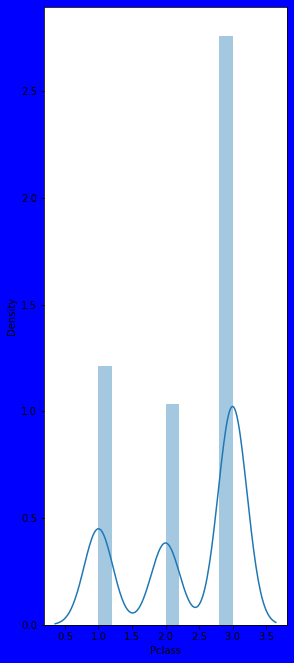

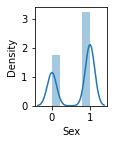

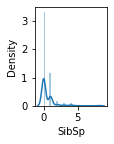

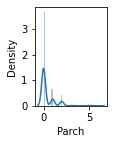

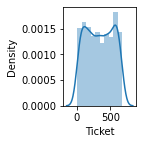

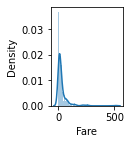

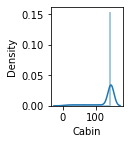

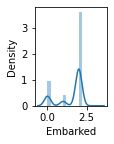

In [76]:
plt.figure(figsize=(20,25),facecolor='blue')
plotnumber=1
for column in data:
 if plotnumber<=8:
    ax=plt.subplot(2,4,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column)
 plotnumber=plotnumber+1
 plt.show()

In [77]:
from sklearn.feature_selection import SelectKBest, f_classif

In [78]:
x=data.drop('Survived',axis=1)
y=data['Survived']

KeyError: "['Survived'] not found in axis"

In [54]:
bf= SelectKBest(score_func=f_classif,k=10)
fit=bf.fit(x,y)
scores=pd.DataFrame(fit.scores_)
columns=pd.DataFrame(x.columns)

In [61]:
Total_Score=pd.concat([columns,scores],axis=1)
Total_Score

,0,0
0,PassengerId,0.022285
1,Pclass,115.031272
2,Sex,372.405724
3,Age,4.353516
4,SibSp,1.110572
5,Parch,5.963464
6,Ticket,24.740828
7,Fare,63.030764
8,Cabin,61.769420
9,Embarked,24.422821
